# INVESTIGATION OF A MEDICAL PATIENTS DATASET

The goal of this analysis is to investigate the 'noshowappointments dataset' and determine the relationship between the variables.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the Dataset

In [2]:
#importing the dataset, highlighting the datetime columns and viewing the first few columns

df = pd.read_csv(r'C:\Users\Victordanok\Desktop\DAILY LEARN\Udacity\Datasets\noshowappointments-kagglev2-may-2016.csv',
                parse_dates=['ScheduledDay', 'AppointmentDay'])
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No


The table above gives us an insight into what the dataset is like, its columns and rows and its datatypes

###

The data shows a list of patients and the hospitals with whom they have their appointments, the date for the appointment as well as the ailments affecting the patients and their respective ages. Also, the data gives an insight to the patients who received an SMS reminder about their appointment and documents if they showed up or not for it.


I am interested in investigating the relationship among the ailments of the patients to see if they correlate with each other.
I also want to see if there are underage who engaged in alcoholism.
Another aspect I would like to investigate is if there are patients with all the ailments and if its more popular amongst the younger patients or older patients.

The following questions were asked of the dataset;

    1. Do we have patients who have the four ailments?
    2. Do we have underage patients who engage in alcoholism?
    3. Does receiving an SMS prompt patients to show up for their appointment?
    4. Is there a visible correlation among the 4 ailments?
  

###  Exploring the dataset

In [3]:
#checking the information on the dataset and the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [4]:
#checking for datatypes

df.dtypes.count

<bound method Series.count of PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object>

The shape of the dataset is 110527 rows and 14 columns.
    
    8 integer columns,
    3 object(string) columns,
    2 datetime columns,
    1 float column,

In [5]:
#checking for shape of df

df.shape

(110527, 14)

In [6]:
#check for null data

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
#check for duplicates

df.duplicated().sum()

0

### Checking for Null Data 

As observed above, the dataset has no null data and every column has been filled out. 

I also checked for duplicated data and found none in the dataset. Having achieved this, I decided to take a closer look at the data and see if it conforms to the standard data quality dimensions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x16FE1BE0>,
      dtype=object)

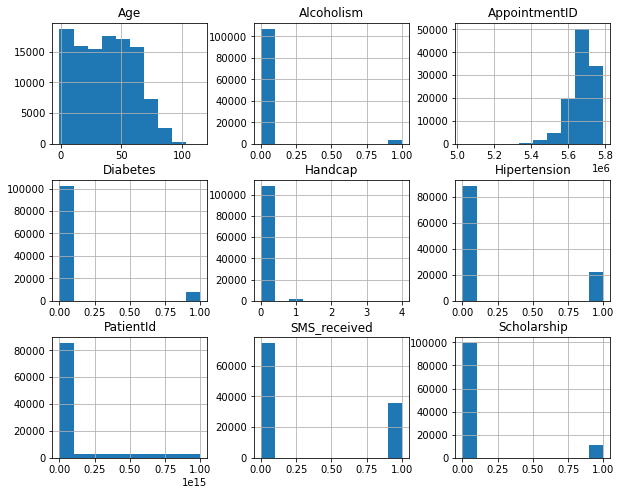

In [8]:
#checking the distribution of data in the columns

df.hist(figsize=(10,8))

#### Some Observations

From the figures above, everything seems to be well distributed but the age and handicap columns have some suprising entries.

The Age column:
    The entry for this column seems to begin before the 0 mark and this would need to be investigated further
    
The handicap column:
    Has values other than 0 or 1 which would have meant that the patient was either handicapable or not. But seeing as entries 0, 1, 2, 3 or 4 were entered, it means the column once categorized their level of physical capabilities and now it has been converted for easy analysis

In [9]:
#check for unique features per column

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [10]:
#why does handcap have 5 unique features

df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [11]:
#renaming columns

df.rename(columns = {'Handcap':'Handicap', 'Hipertension':'Hypertension'}, inplace = True)

In [12]:
#checking for inconsistencies in the data

df.query('Age == 0 & Hypertension == 1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


The above table checks to see if there is any patient who is hypertensive and also aged zero. This is a check for inconsistencies in the data

In [13]:
#checking for inconsistencies in the data

df.query('Age == 0 & Handicap == 1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
98247,3.647246e+14,5788682,F,2016-06-08 13:18:12+00:00,2016-06-08 00:00:00+00:00,0,JABOUR,0,0,0,0,1,0,No


The table above checks if there is a patient who is aged zero and also handicaped and we got one patient

In [14]:
#checking for inconsistencies in the data

df.query('Age == 0 & Diabetes == 1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


The above table shows that there is no patient with the age of 0 that also has diabetes, this is a check for inconsistencies in the data

In [15]:
#checking for inconsistencies in the data

df.query('Age <= 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29 08:08:43+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29 08:53:02+00:00,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16 12:30:58+00:00,2016-06-01 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06 14:22:34+00:00,2016-06-08 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03 15:18:44+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03 08:56:51+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No


The above table shows the rows with age of either 0 or lower, but due to the volume of rows, we cant examine if there are ages below 0, hence we will do that below

In [16]:
#checking for inconsistencies in the data

df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


#### Inconsistencies in the dataset

Upon closer inspection, I noticed some patients were aged 0 and documented, but after abit exploration and confirming that they had no ailments such as Alcoholism, Diabetes or Hypertension. Those patients were included as babies who were all under the age of 1 year old.



In [17]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [18]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The table above shows the descriptive statistics for the entirety of the dataset

In [19]:
#creating an age group column to categorize the ages of all patients

cut_ages = [-2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120]
df['AgeGroup'] = pd.cut(df['Age'], cut_ages)

In [20]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,"(60, 70]"
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,"(50, 60]"
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,"(60, 70]"


The above table shows us that the ages have been categorized and converted from continuous data to a category.

#### Categorizing the Age Column

A new column 'AgeGroup' was created to convert the data in the 'Age' column from continuous data into a category so it would be easier to get an insight into the ages of the patients easily. The ages were spread 10 years apart.

It should also be noted that for this analysis, the legal age for adulthood is 21 years old.

In [21]:
#checking for null data in the new column to ensure all columns are filled

df[df.AgeGroup.isnull()]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AgeGroup


The above table shows that there is no null data in the dataset

Text(0.5, 1.0, 'Gender Distribution of Patients')

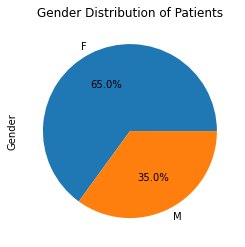

In [22]:
#Gender distribution in the dataset

df['Gender'].value_counts().plot.pie(autopct = '%.1f%%')
plt.title('Gender Distribution of Patients')

The above pie chart shows the gender distribution of patients in the data set and we can see that 65% of the patients are female and only 35% are male.

Text(0.5, 1.0, 'Percentage of Appointments')

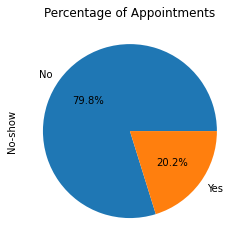

In [23]:
#What Percentage of patients showed up for their appointment?

df['No-show'].value_counts().plot.pie(autopct = '%.1f%%')
plt.title('Percentage of Appointments')

The pie chart above shows us that 79.8% of the patients in the dataset kept their appointment and 20.2% missed it. 

Text(0.5, 1.0, 'Percentage of Patients with a Health Scholarship')

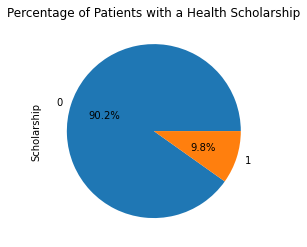

In [24]:
#What percentage of patients have a Health Scholarship

df['Scholarship'].value_counts().plot.pie(autopct = '%.1f%%')
plt.title('Percentage of Patients with a Health Scholarship')

9.8% of the patients have a health scholarship while the other 90.2% do not, which shows that the health scholarship is not a popular or readily available to everyone.

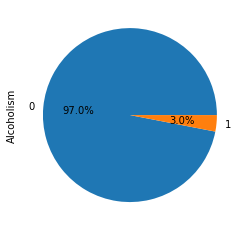

In [25]:
#What Percentage of patients have alcoholism?

df['Alcoholism'].value_counts().plot.pie(autopct = '%.1f%%')
#plt.title('Percentage of Patients dealing with Alcoholism')

Only 3% of the entire dataset is dealing with alcoholism as shown from the chart above

Text(0.5, 1.0, 'Percentage of Patients dealing with Diabetes')

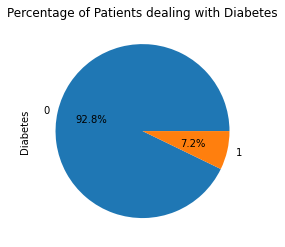

In [26]:
#What percentage of patients have diabetes?

df['Diabetes'].value_counts().plot.pie(autopct = '%.1f%%')
plt.title('Percentage of Patients dealing with Diabetes')

Only 7.2% of the entire population of the patients are dealing with diabetes

Text(0.5, 1.0, 'Percentage of Patients that received an SMS')

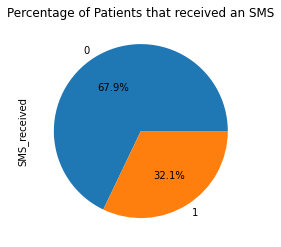

In [27]:
#what percentage of patients received an SMS reminder about their appointment?

df['SMS_received'].value_counts().plot.pie(autopct = '%.1f%%')
plt.title('Percentage of Patients that received an SMS')

32.1% of the population received an sms reminder to show up at the hospital while the other 67.9% did not

Text(0.5, 1.0, 'Percentage of Patients dealing with Hypertension')

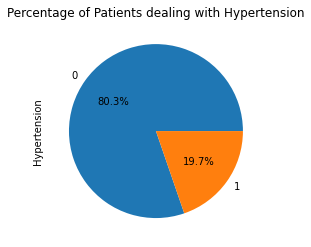

In [28]:
#how many of the patients are hypertensive?

df['Hypertension'].value_counts().plot.pie(autopct = '%.1f%%')
plt.title('Percentage of Patients dealing with Hypertension')

19.7% of the population of the patients are dealing with Hypertension


Text(0.5, 1.0, 'Bar Chart showing Age Group distribution')

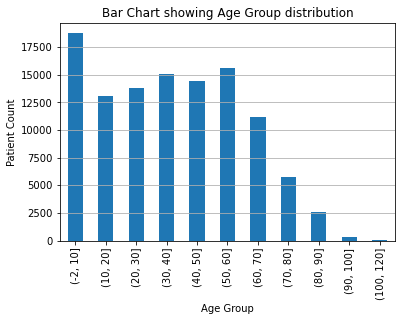

In [29]:
#Age Group Distribution of Patients in the dataset

df.AgeGroup.value_counts().sort_index().plot.bar()
plt.grid(axis = 'y')
plt.ylabel('Patient Count')
plt.xlabel('Age Group')
plt.title('Bar Chart showing Age Group distribution')

The bar chart above shows the age distribution of the patients and as is shown, majority of the patients are below the age of 40. We also have some elderly patients who are over a 80 years

### Does the dataset have Patients who have the four ailments?

In [30]:
#df1 is a dataset containing patients with 4 ailments

df1 = df.loc[(df['Alcoholism'] == 1) & (df['Handicap'] >= 1)
         & (df['Diabetes'] == 1) & (df['Hypertension'] == 1)]

In [31]:
df1.shape

(13, 15)

In [32]:
#which of these patients are on a health scholarship?

df1.loc[(df1['Scholarship']==1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AgeGroup


The above table shows that there is no patient who has all the ailments and also on a health scholarship

In [33]:
#which of these patients received an SMS reminding them about their appointment?

df1.loc[(df1['SMS_received']== 1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AgeGroup
103548,8.588652e+12,5717284,F,2016-05-19 07:47:46+00:00,2016-06-02 00:00:00+00:00,54,JESUS DE NAZARETH,0,1,1,1,1,1,Yes,"(50, 60]"
106517,8.588652e+12,5690452,F,2016-05-12 10:04:18+00:00,2016-06-01 00:00:00+00:00,54,JESUS DE NAZARETH,0,1,1,1,1,1,No,"(50, 60]"
106544,8.588652e+12,5758023,F,2016-06-01 10:09:39+00:00,2016-06-07 00:00:00+00:00,54,JESUS DE NAZARETH,0,1,1,1,1,1,No,"(50, 60]"


The above table shows the number of patients who have all the ailments and also received an SMS reminding them of their appointment

Text(0, 0.5, 'Gender')

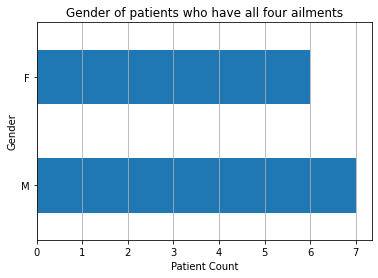

In [34]:
#Horizontal Bar chart showing Patients with All 4 ailments

df1['Gender'].value_counts().plot.barh()
plt.grid(axis = 'x')
plt.title('Gender of patients who have all four ailments')
plt.xlabel('Patient Count')
plt.ylabel('Gender')

The above chart shows the gender distribution of all patients who have all four ailments with the males representing with 7 patients and the females having only 6

Text(0, 0.5, 'Age Group')

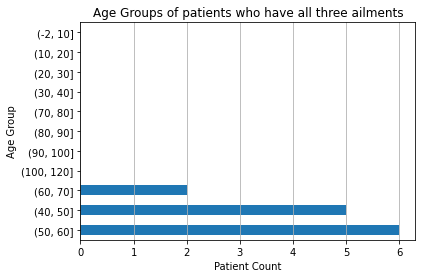

In [35]:
#age group of patients with 4 ailments

df1['AgeGroup'].value_counts().plot.barh()
plt.grid(axis = 'x')
plt.title('Age Groups of patients who have all three ailments')
plt.xlabel('Patient Count')
plt.ylabel('Age Group')

The above shows the age distribution of the patients who have all four ailments.

The highest majority of 6 patients being between patients between the ages of 50 to 60 years old with the age group of 40 to 50 coming a close second and patients between the ages of 60 to 70 having just two.

In [36]:
#patients who missed and attended the appointment

df1['No-show'].value_counts()

No     9
Yes    4
Name: No-show, dtype: int64

In the entirety of the dataset, Fourteen out of all the patients have alcoholism, diabetes and are also handicap and none of them are have a health scholarship.
These fourteen patients are all from the ages of 40 to 70 and six of them are females while the other 8 are males


Of all 14, Nine showed up for their appointments, while the other five were a No show.

Three of these fourteen patients received an SMS about their appointments and only two out these three showed up.

### Do the Underage Patients engage in Alcoholism?

In [37]:
#df2 explores the rate of underage drinking in the patients

df2 = df.loc[(df['Age'] < 21) & (df['Alcoholism'] == 1)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

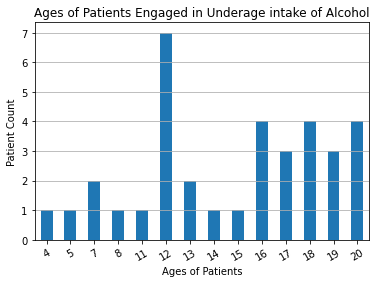

In [38]:
df2['Age'].value_counts().sort_index().plot.bar()
plt.grid(axis = 'y')
plt.title('Ages of Patients Engaged in Underage intake of Alcohol')
plt.xlabel('Ages of Patients')
plt.ylabel('Patient Count')
plt.xticks(rotation =  30)

The above chart shows the age distribution of underage patients involved in consuming alcohol, with age 12 being the highest with a total of 7.

it is also alarming that there is a count for patients under the age of 10.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

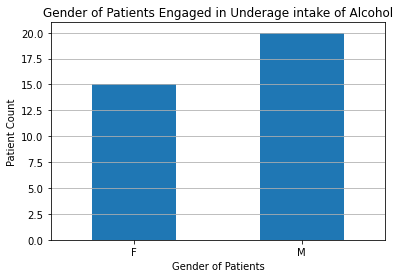

In [39]:
df2['Gender'].value_counts().sort_index().plot.bar()
plt.grid(axis = 'y')
plt.title('Gender of Patients Engaged in Underage intake of Alcohol')
plt.xlabel('Gender of Patients')
plt.ylabel('Patient Count')
plt.xticks(rotation =  0)

The chart above shows the gender distribution for the underage patients involved in alcoholism. The distribution indicates that more male underage patients tend to take alcohol compared to the females.

In [40]:
#how many patients engaged in underage drinking missed their appointments?

df2.loc[(df2['No-show'].str.startswith('Y'))].shape

(15, 15)

In [41]:
#how many patients engaged in underage drinking received an sms and went for the appointment?

df2.loc[(df2['No-show'].str.startswith('N')) & (df2['SMS_received'] == 1)].shape

(5, 15)

In [42]:
#How many patients engaged in underage drinking and went for their appointment have an health scholarship?

df2.loc[(df2['No-show'].str.startswith('N')) & (df2['Scholarship'] == 1)].shape

(4, 15)

In [43]:
#how many patients engaged in underage drinking have a health scholarship?

df2.loc[(df2['Scholarship'] == 1)].shape

(10, 15)

In [44]:
#How many patients engaged in Underage drinking have either diabetes or Hypertension?

df2.loc[(df2['Hypertension'] == 0) & (df2['Diabetes'] == 1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AgeGroup


There is no underage patient who is diabetic and also involved in alcoholism

In [45]:
#How many patients engaged in Underage drinking have either diabetes or Hypertension?


df2.loc[(df2['Hypertension'] == 1) & (df2['Diabetes'] == 0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AgeGroup


There is no underage patient who is hypertensive and also involved in alcoholism

### Does Receiving an SMS prompt Patients to keep their Appointment?

In [46]:
#Creating the dataset

df3 = df.loc[(df['SMS_received'] == 1)]

In [47]:
#shape of the dataset

df3.shape

(35482, 15)

In [48]:
#number of patients who kept their appointment

df3.loc[(df3['No-show'].str.startswith('N'))].shape

(25698, 15)

Text(0.5, 1.0, 'Distribution of Patients kept their appointment')

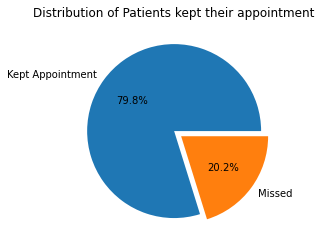

In [49]:
#Patients in the dataset that showed up for the Appointment

labels = ['Kept Appointment', 'Missed']
sizes = df['No-show'].value_counts()
explode = [0, 0.1]
plt.pie(x = sizes, labels = labels, autopct = '%.1f%%', explode = explode)
plt.title('Distribution of Patients kept their appointment')

The above pie chart shows the distribution of patients who missed and kept their appointment from the entire dataset. 79.8% kept their appointment and 20.2% missed it.

Text(0.5, 1.0, 'Distribution of Patients who received an SMS and kept their appointment')

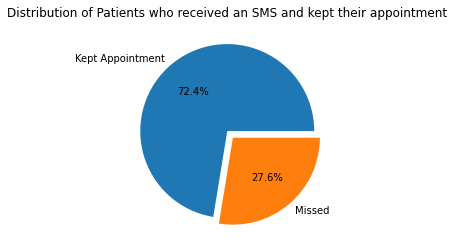

In [50]:
#Patients that got an SMS and showed up for the appointment

labels = ['Kept Appointment', 'Missed']
sizes = df3['No-show'].value_counts()
explode = [0, 0.1]
plt.pie(x = sizes, labels = labels, autopct = '%.1f%%', explode = explode)
plt.title('Distribution of Patients who received an SMS and kept their appointment')

The above pie chart shows the distribution of patients who received an SMS and still kept their appointment and those who got reminded and still missed it

Text(0.5, 1.0, 'Distribution of Patients who didnt receive an SMS but kept their appointment')

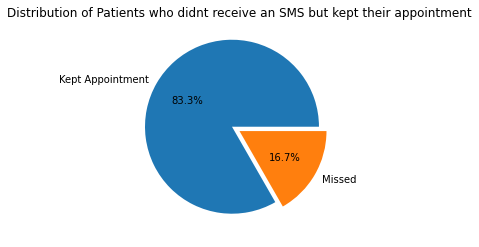

In [51]:
#distribution of patients that didnt get an SMS

labels = ['Kept Appointment', 'Missed']
sizes = df.loc[(df['SMS_received'] == 0)]['No-show'].value_counts()
explode = [0.1, 0]
plt.pie(x = sizes, labels = labels, autopct = '%.1f%%', explode = explode)
plt.title('Distribution of Patients who didnt receive an SMS but kept their appointment')

The above pie chart shows the distribution of patients who didnt receive an SMS but still kept their appointment and it shows that majority of patients are prone to keep their appointments regardless of the fact if they received an SMS or not

In [52]:
#number of patients who have a scholarship

df3.query('Scholarship == 1').shape

(3505, 15)

In [53]:
#number of patients who have both hypertension and alcoholism and handicap

df.query('Alcoholism == 1 & Hypertension == 1 & Handicap == 1').shape

(38, 15)

In [54]:
#number of patients who have both alcoholism and hypertension and diabetes

df.query('Alcoholism == 1 & Hypertension == 1 & Diabetes == 1').shape

(256, 15)

In [55]:
df[['Age', 'Alcoholism', 'Hypertension', 'Diabetes', 'Handicap', 'Scholarship']].corr()


,Age,Alcoholism,Hypertension,Diabetes,Handicap,Scholarship
Age,1.000000,0.095811,0.504586,0.292391,0.078033,-0.092457
Alcoholism,0.095811,1.000000,0.087971,0.018474,0.004648,0.035022
Hypertension,0.504586,0.087971,1.000000,0.433086,0.080083,-0.019729
Diabetes,0.292391,0.018474,0.433086,1.000000,0.057530,-0.024894
Handicap,0.078033,0.004648,0.080083,0.057530,1.000000,-0.008586
Scholarship,-0.092457,0.035022,-0.019729,-0.024894,-0.008586,1.000000


The above chart shows the correlation between the ailments and the health scholarship

### Conclusion

After a thorough investigation of the dataset, I posed some questions and used my analysis of the dataset to arrive at some conclusions.

    Correlation:
    There is very little correlation among the data provided in the dataset as shown from the correlation table. 
     The strongest correlation we have is between age and hypertension which is 0.5 which suggests that age plays a role in getting hypertensive.
    Another correlation is between Diabetes and Hypertension of 0.4 which may suggest that a diabetic patient is more likely to contract Hypertension
    
    Health Scholarship:
    It is shown that the health scholarship is not popular among the patients, as less than 10% of the entire dataset are enrolled in it.
    
     Age Group of Patients:
    From the age group distribution chart, we see that the data is skewed towards the younger patients, this might suggest why we dont see higher cases of hypertension and diabetes amongst the dataset.
    
    Patients with 4 Ailments:
    We have 13 patients in this category, and all patients are from the ages of 40 to 70 which goes to further illustrate that the older a patient gets, the more likely his/her chances of contracting Alcoholism, Hypertension or Diabetes.
    
    Underage Intake of Alcohol:
    We can see that some patients consume alcohol illegally and that the male underage patients are more prone to it than the female underage patients.
    
    SMS Reminder for Appointment
    The information gathered from the dataset shows that the SMS reminders do not play any significant role in getting a patient to keep their appointment as more turn outs were gotten from patients who didnt get any reminders
    

#### Limitations

Most of the patients aged 0 to 10 might not have a phone, hence using the SMS reminder to estimate their behavior might not be entirely accurate as they would not receive the reminders directly.

Most of the data is categorical converted into dummy variables, hence the correlation between the variables are quite low and we cant show any strong correlation among them.

The statistics done here is purely descriptive and no inferential statistics were done